In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
N = 100
t = np.linspace(0, 5, N)
#Constantes
A = 0.01
l = 0.30
k = 389.6
n = 1
cv = (3/2)*8.314
C = (k*A)/(n*cv*l)

In [49]:
init_conditions = [400, 200]
def f0(T1, T2, C):
  return -C*(T1-T2)
def f1(T1, T2, C):
  return C*(T1 - T2)


In [50]:
def getEuler2(fo, f1, init_conditions, t):
    h = (t[-1] - t[0])/(len(t)-1)

    T1 = np.zeros(N)
    T2 = np.zeros(N)

    T1[0] = init_conditions[0]
    T2[0] = init_conditions[1]

    k1 = np.zeros(2)
    k2 = np.zeros(2)

    for i in range(1, len(t)):


      k1[0] = f0(T1[i-1], T2[i-1], C)
      k1[1] = f1(T1[i-1], T2[i-1], C)

      k2[0] = f0(T1[i-1] + h*k1[0], T2[i-1] + h*k1[1], C)
      k2[1] = f1(T1[i-1] + h*k1[0], T2[i-1] + h*k1[1], C)

      T1[i] = T1[i-1] + 0.5*h*(k1[0]+k2[0])
      T2[i] = T2[i-1] + 0.5*h*(k1[1]+k2[1])

    return T1, T2

In [51]:
T_1, T_2 = getEuler2(f0, f1, init_conditions, t)

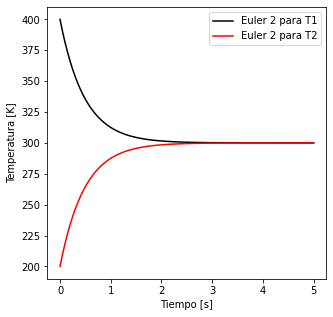

In [53]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [K]")
ax.plot(t, T_1, c = 'k', label = "Euler 2 para T1")
ax.plot(t, T_2, c = 'r', label = "Euler 2 para T2")
plt.legend()


Pasado un tiempo t ambos cuerpos logran llegar a un equilibrio termodinámico. Se puede observar que la temperatura de equilibrio es 300K por lo que: \\
$\lim_{t \to ∞}T_{1}(t) = \lim_{t \to ∞}T_{2}(t) = 300K$. \\
Dicho fenómeno se logra gracias al flujo de calor entre ambas secciones del cilindro a través del alambre de cobre.